In [ ]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re


### Import Data

In [ ]:
df = pd.read_csv('train.csv')
df.info()


<ipython-input-22-fa296f7ac0d5>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


<Axes: >

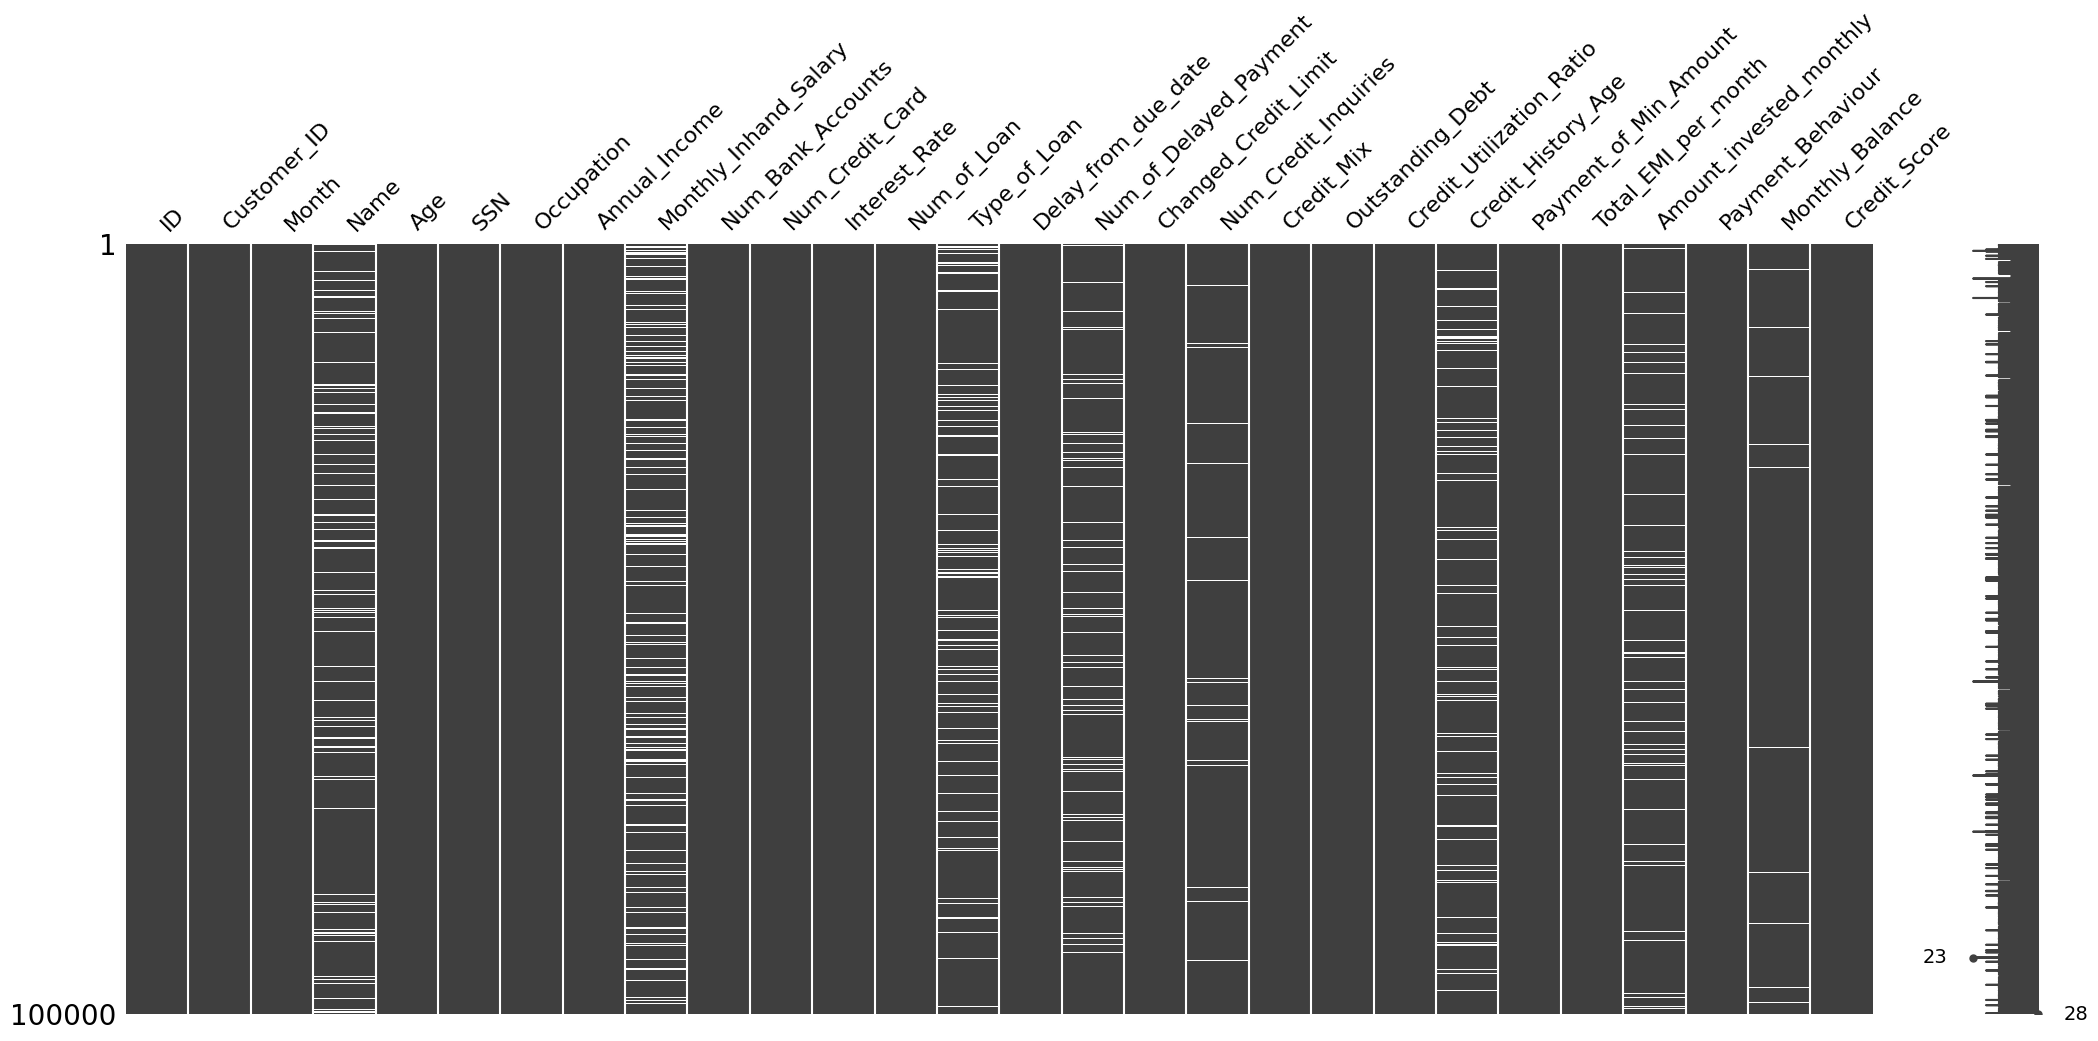

In [ ]:
missingno.matrix(df)

Checking ID

In [ ]:
df['ID'].nunique()

Checking Month Column

In [ ]:
df['Month'].unique()


Fill the missing value with Unknown

Cleaning Age column for test file

In [ ]:
df['Age'] = df['Age'].str.replace(r'\D', '', regex=True).astype(int)



In [ ]:
print(df['Age'])

In [ ]:
df['Age'] = df['Age'].apply(lambda x: x if x >= 0  else pd.NA)
df['Age'] = df['Age'].apply(lambda x: x if x <= 100 else pd.NA)
has_nan = df['Age'].isna().any()

if has_nan:
    print("The 'Age' column has NaN values.")
else:
    print("The 'Age' column does not have any NaN values.")


In [ ]:
(df['Age'] > 100).sum()

In [ ]:

df = df.dropna(subset=["Age"])
plt.hist(df["Age"], bins=10, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

Change SSN column for wrong values

In [ ]:
pattern = r'\d{3}-\d{2}-\d{4}'

# Clean the 'SSN' column
df['SSN'] = df['SSN'].apply(lambda x: x if re.match(pattern, str(x)) else pd.NA)


In [ ]:
#df['SSN'].fillna('Unknown', inplace=True)

In [ ]:
# print(df['SSN'][5])

In [ ]:
df = df.dropna(subset=["Occupation"])
plt.hist(df["Occupation"], bins=20, edgecolor='black')
plt.xlabel("Occupation")
plt.ylabel("Frequency")
plt.title("Occupation Distribution")
plt.show()

replace the wrong value for occupation  

In [ ]:
df['Occupation'] = df['Occupation'].str.replace('[^a-zA-Z\s]', '', regex=True)
df['Occupation'] = df['Occupation'].replace('', np.nan)


In [ ]:
#df['Occupation'].fillna('Unknown', inplace=True)


In [ ]:
no_integers = not df['Month'].astype(str).str.isnumeric().any()

if no_integers:
    print("There are no integer values in the 'Occupation' column.")
else:
    print("There are integer values in the 'Occupation' column.")


In [ ]:
print(df['Occupation'][4])

In [ ]:
df.sort_values(by=['Customer_ID'], inplace=True, ascending=False)


In [ ]:
df = df.ffill(axis='rows')


In [ ]:
d = {'January':1, 'February':2, 'March':3, 'April':4 , 'May':5, 'June':6 , 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

df['Month'] = df['Month'].map(d)


In [ ]:
df['Occupation'].unique()

In [ ]:
df['Occupation'].replace(['Scientist', 'Musician', 'Doctor', 'Entrepreneur', 'Manager',
                          'Writer', 'MediaManager', 'Mechanic', 'Teacher', 'Architect',
                          'Accountant', 'Lawyer', 'Engineer', 'Developer', 'Journalist'],
                        [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)


In [ ]:
df['Occupation'].unique()

In [ ]:
df.info()


'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan'

Annual_Income

In [ ]:
na_count = df['Annual_Income'].isna().sum()
print("Number of NaN values in 'Annual_Income':", na_count)

In [ ]:
df['Annual_Income'].info()

In [ ]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [ ]:
df['Annual_Income'].info()

In [ ]:
unique_count = df['Annual_Income'].nunique()
print("Number of unique values in 'Annual_Income':", unique_count)

In [ ]:
df['Annual_Income'].describe()

Monthly_Inhand_Salary

In [ ]:
na_count = df['Monthly_Inhand_Salary'].isna().sum()
print("Number of NaN values in 'Annual_Income':", na_count)

In [ ]:
df['Monthly_Inhand_Salary'].info()

In [ ]:
df['Monthly_Inhand_Salary'].describe()

In [ ]:
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='ffill')

In [ ]:
na_count = df['Monthly_Inhand_Salary'].isna().sum()
print("Number of NaN values in 'Annual_Income':", na_count)

In [ ]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform('mean'))

In [ ]:
na_count = df['Monthly_Inhand_Salary'].isna().sum()
print("Number of NaN values in 'Monthly_Inhand_Salary':", na_count)

In [ ]:
df['Monthly_Inhand_Salary'].describe()

Num_Bank_Accounts

In [ ]:
na_count = df['Num_Bank_Accounts'].isna().sum()
print("Number of NaN values in 'Num_Bank_Accounts':", na_count)

In [ ]:
df['Num_Bank_Accounts'].info()

In [ ]:
df['Num_Bank_Accounts'].describe()

In [ ]:
df['Num_Bank_Accounts'].median()

In [ ]:
# I have checked -1 values in the data base and decided to change it to 0

In [ ]:
df.loc[df['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = 0

In [ ]:
df['Num_Bank_Accounts'].describe()

In [ ]:
df['Num_Bank_Accounts'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform('median')

In [ ]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(int)

In [ ]:
plt.hist(df['Num_Bank_Accounts'], bins=15)
plt.xlabel('Num_Bank_Accounts')
plt.ylabel('Frequency')
plt.title('Histogram of Num Bank Account')
plt.show()

Num_Credit_Card

In [ ]:
na_count = df['Num_Credit_Card'].isna().sum()
print("Number of NaN values in 'Num_Credit_Card':", na_count)

In [ ]:
df['Num_Credit_Card'].info()

In [ ]:
df['Num_Credit_Card'].describe()

In [ ]:
df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].transform('median')

In [ ]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].astype(int)

In [ ]:
df['Num_Credit_Card'].describe()

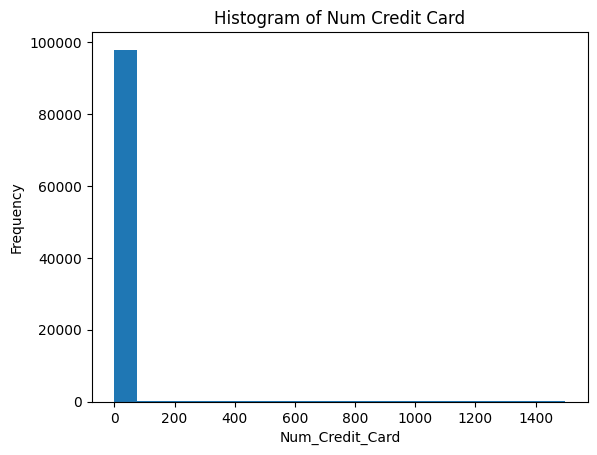

In [ ]:
plt.hist(df['Num_Credit_Card'], bins=20)
plt.xlabel('Num_Credit_Card')
plt.ylabel('Frequency')
plt.title('Histogram of Num Credit Card')
plt.show()

Interest_Rate

In [ ]:
na_count = df['Interest_Rate'].isna().sum()
print("Number of NaN values in 'Interest_Rate':", na_count)

In [ ]:
df['Interest_Rate'].info()

In [ ]:
df['Interest_Rate'].describe()

In [ ]:
df['Interest_Rate'].median()

In [ ]:
df['Interest_Rate'] = df.groupby('Customer_ID')['Interest_Rate'].transform('median')

In [ ]:
df['Interest_Rate'].describe()

In [ ]:
plt.hist(df['Interest_Rate'], bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Interest Rate')
plt.show()

Num_of_Loan

In [ ]:
na_count = df['Num_of_Loan'].isna().sum()
print("Number of NaN values in 'Num_of_Loan':", na_count)

In [ ]:
df['Num_of_Loan'].info()

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(float)

In [ ]:
df['Num_of_Loan'].info()

In [ ]:
df['Num_of_Loan'].describe()

In [ ]:
df['Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].transform('median')

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [ ]:
df['Num_of_Loan'].describe()

Type_of_Loan

In [ ]:
df['Auto_Loan_Dummy'] = df['Type_of_Loan'].apply(lambda x: 1 if isinstance(x, str) and ('Auto Loan' in x or 'AutoLoan' in x) else 0)
df['Auto_Loan_Dummy'] = df['Auto_Loan_Dummy'].fillna(0).astype(int)

In [ ]:
df['Credit_Builder_Loan_Dummy'] = df['Type_of_Loan'].apply(lambda x: 1 if isinstance(x, str) and ('Credit-Builder Loan' in x or 'Credit-BuilderLoan' in x) else 0)
df['Credit_Builder_Loan_Dummy'] = df['Credit_Builder_Loan_Dummy'].fillna(0).astype(int)

In [ ]:
df['Debt_Consolidation_Loan_Dummy'] = df['Type_of_Loan'].apply(lambda x: 1 if isinstance(x, str) and ('Debt Consolidation Loan' in x or 'DebtConsolidationLoan' in x) else 0)
df['Debt_Consolidation_Loan_Dummy'] = df['Debt_Consolidation_Loan_Dummy'].fillna(0).astype(int)

In [ ]:
df['Home_Equity_Loan_Dummy'] = df['Type_of_Loan'].apply(lambda x: 1 if isinstance(x, str) and ('Home Equity Loan' in x or 'HomeEquityLoan' in x) else 0)
df['Home_Equity_Loan_Dummy'] = df['Home_Equity_Loan_Dummy'].fillna(0).astype(int)

In [ ]:
df['Mortgage_Loan_Dummy'] = df['Type_of_Loan'].apply(lambda x: 1 if isinstance(x, str) and ('Mortgage Loan' in x or 'MortgageLoan' in x) else 0)
df['Mortgage_Loan_Dummy'] = df['Mortgage_Loan_Dummy'].fillna(0).astype(int)

In [ ]:
df['Not_Specified_Dummy'] = df['Type_of_Loan'].apply(lambda x: 1 if isinstance(x, str) and ('Not Specified' in x or 'NotSpecified' in x) else 0)
df['Not_Specified_Dummy'] = df['Not_Specified_Dummy'].fillna(0).astype(int)

In [ ]:
df['Payday_Loan_Dummy'] = df['Type_of_Loan'].apply(lambda x: 1 if isinstance(x, str) and ('Payday Loan' in x or 'PaydayLoan' in x) else 0)
df['Payday_Loan_Dummy'] = df['Payday_Loan_Dummy'].fillna(0).astype(int)

In [ ]:
df['Personal_Loan_Dummy'] = df['Type_of_Loan'].apply(lambda x: 1 if isinstance(x, str) and ('Personal Loan' in x or 'PersonalLoan' in x) else 0)
df['Personal_Loan_Dummy'] = df['Personal_Loan_Dummy'].fillna(0).astype(int)

In [ ]:
df['Student_Loan_Dummy'] = df['Type_of_Loan'].apply(lambda x: 1 if isinstance(x, str) and ('Student Loan' in x or 'StudentLoan' in x) else 0)
df['Student_Loan_Dummy'] = df['Student_Loan_Dummy'].fillna(0).astype(int)

In [ ]:
df[['Type_of_Loan', 'Auto_Loan_Dummy', 'Credit_Builder_Loan_Dummy', 'Debt_Consolidation_Loan_Dummy','Home_Equity_Loan_Dummy', 'Mortgage_Loan_Dummy',
    'Not_Specified_Dummy', 'Payday_Loan_Dummy', 'Personal_Loan_Dummy', 'Student_Loan_Dummy']].head()

,Type_of_Loan,Auto_Loan_Dummy,Credit_Builder_Loan_Dummy,Debt_Consolidation_Loan_Dummy,Home_Equity_Loan_Dummy,Mortgage_Loan_Dummy,Not_Specified_Dummy,Payday_Loan_Dummy,Personal_Loan_Dummy,Student_Loan_Dummy
0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
1,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
2,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0


Delay_from_due_date


In [ ]:
# check data type
df['Delay_from_due_date'].dtype

In [ ]:
# check logically if any values less than 0
(df['Delay_from_due_date'] < 0).sum()

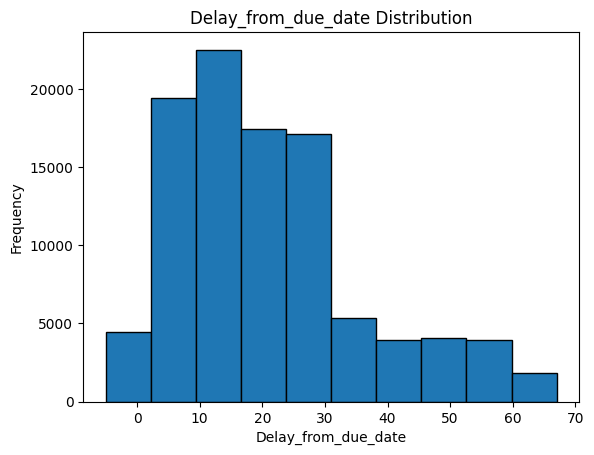

In [ ]:
df = df.dropna(subset=["Delay_from_due_date"])
plt.hist(df["Delay_from_due_date"], bins=10, edgecolor='black')
plt.xlabel("Delay_from_due_date")
plt.ylabel("Frequency")
plt.title("Delay_from_due_date Distribution")
plt.show()

In [ ]:
df['Delay_from_due_date'].describe()

In [ ]:
## it must be greater than zero:
# removes all the characters other than numbers
# convert the integer values to strings before removing
df['Delay_from_due_date'] = df['Delay_from_due_date'].astype(str).str.replace(r'\D', '', regex=True)
# convert back to the integer values
df['Delay_from_due_date'] = df['Delay_from_due_date'].astype(int)
# check if any values less than 0
(df['Delay_from_due_date'] < 0).sum()

In [ ]:
# check data type
df['Delay_from_due_date'].dtype

Num_of_Delayed_Payment


In [ ]:
# removes all the characters other than numbers
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'\D', '', regex=True)
# check data type
df['Num_of_Delayed_Payment'].dtype

In [ ]:
df['Num_of_Delayed_Payment'].isnull().sum()

In [ ]:
# replace empty strings with NaN values
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].replace('', np.nan)
df['Num_of_Delayed_Payment'].isnull().sum()

In [ ]:
# missing values are replaced with the corresponding values from the same group Customer_ID.
# regardless of their position within the group (forward fill (ffill) and backward fill (bfill)).
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].fillna(method='ffill')
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].fillna(method='bfill')

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('Int64')
df['Num_of_Delayed_Payment'].dtype

In [ ]:
df['Num_of_Delayed_Payment'].isnull().sum()

Changed_Credit_Limit


In [ ]:
# removes all the characters other than numbers
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace(r'\D', '', regex=True)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('', np.nan)

In [ ]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype('float')
df['Changed_Credit_Limit'].dtype

dtype('float64')

In [ ]:
df['Changed_Credit_Limit'].isnull().sum()

2091

In [ ]:
# missing values are replaced with the corresponding values from the same group Customer_ID.
# regardless of their position within the group (forward fill (ffill) and backward fill (bfill)).
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].fillna(method='ffill')
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].fillna(method='bfill')
df['Changed_Credit_Limit'].isnull().sum()

0

Num_Credit_Inquiries


In [ ]:
df['Num_Credit_Inquiries'].isnull().sum()


1965

In [ ]:
# removes all the characters other than numbers
# convert the integer values to strings before removing
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(str).str.replace(r'\D', '', regex=True)
# replace empty strings with NaN values
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].replace('', np.nan)
# convert back to the integer values
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype('Int64')


In [ ]:
df['Num_Credit_Inquiries'].isnull().sum()

1965

In [ ]:
# missing values are replaced with the corresponding values from the same group Customer_ID.
# regardless of their position within the group (forward fill (ffill) and backward fill (bfill)).
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].fillna(method='ffill')
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].fillna(method='bfill')
df['Num_Credit_Inquiries'].isnull().sum()

0

Credit Mix

In [ ]:
# removes all the characters other than numbers and letters
df['Credit_Mix'] = df['Credit_Mix'].str.replace(r"[^a-zA-Z0-9]", "",regex=True)
#check unique values
print(df['Credit_Mix'].unique())

['' 'Good' 'Standard' 'Bad']


In [ ]:
# replace empty strings with NaN values
df['Credit_Mix'] = df['Credit_Mix'].replace('', np.nan)
#check unique values
print(df['Credit_Mix'].unique())

[nan 'Good' 'Standard' 'Bad']


In [ ]:
#check missing values
df['Credit_Mix'].isnull().sum()

20195

In [ ]:
# missing values are replaced with the corresponding values from the same group Customer_ID.
# regardless of their position within the group (forward fill (ffill) and backward fill (bfill)).
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].fillna(method='ffill')
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].fillna(method='bfill')

In [ ]:
#check unique values
print(df['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


In [ ]:
#check missing values
df['Credit_Mix'].isnull().sum()

0

In [ ]:
# Define a dictionary to map the string values to numeric values
mapping = {'Bad': 1, 'Standard': 2, 'Good': 3}

# Use the map() method to convert the values in the "Credit_Mix" column
df['Credit_Mix'] = df['Credit_Mix'].map(mapping)

#check unique values
print(df['Credit_Mix'].unique())


[3 2 1]


In [ ]:
# # convert to the integer values
# df['Credit_Mix'] = df['Credit_Mix'].astype(int)
# check data type
df['Credit_Mix'].dtype

dtype('int64')

Outstanding_Debt   

In [ ]:
# removes all the characters other than numbers
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'\D', '', regex=True)
df['Outstanding_Debt'] = df['Outstanding_Debt'].replace('', np.nan)
# convert back to the numetrical values
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [ ]:
df['Outstanding_Debt'].isnull().sum()

0

Credit_Utilization_Ratio

In [ ]:
# check logically if any values less than 0
(df['Credit_Utilization_Ratio'] < 0).sum()

0

In [ ]:
df['Credit_Utilization_Ratio'].isnull().sum()

0

In [ ]:
df[['Delay_from_due_date',
         'Num_of_Delayed_Payment',
         'Changed_Credit_Limit',
         'Num_Credit_Inquiries',
         'Credit_Mix',
         'Outstanding_Debt',
         'Credit_Utilization_Ratio']].dtypes

Delay_from_due_date           int64
Num_of_Delayed_Payment        Int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          Int64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
dtype: object

In [ ]:
# df.head()

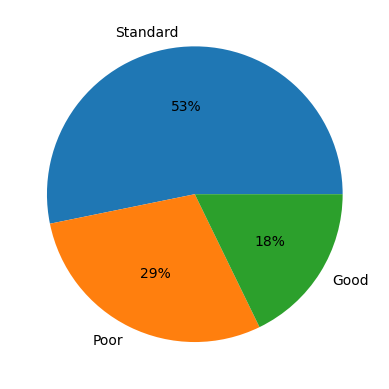

In [ ]:
plt.pie(df['Credit_Score'].value_counts(), labels=df['Credit_Score'] .value_counts().index,autopct='%.0f%%')
plt.show()

In [ ]:
# plt.figure(figsize=(20,10))
# sns.boxplot(df['Delay_from_due_date'])
# plt.xticks(rotation=30)
# plt.show()

<Axes: xlabel='Occupation', ylabel='count'>

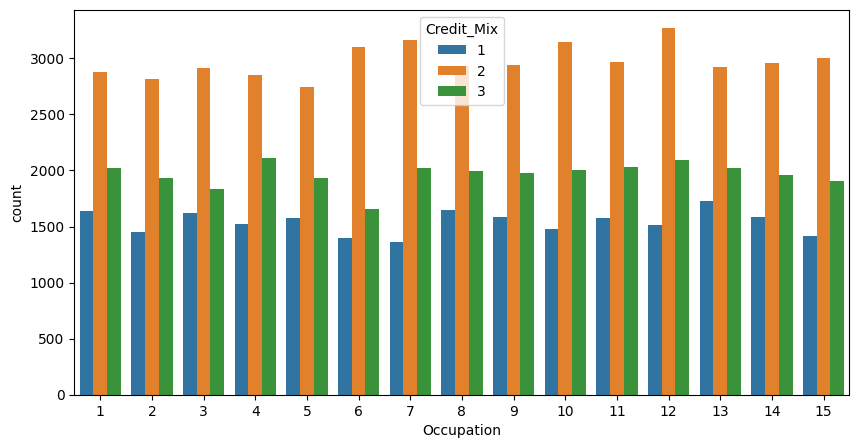

In [ ]:
fig = plt.figure(figsize= (10,5))
sns.countplot(data=df,x="Occupation",hue="Credit_Mix")

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


Credit_History_Age

In [ ]:
mis = df['Credit_Score'].fillna(df['Credit_Score'].mode()[0], inplace=True)
print(mis)

None


In [ ]:
conv = df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if re.findall(r'\d+', str(x)) else None)
print(conv)

99159    18
99158    18
99157    18
99156    18
99155    18
         ..
56755    10
56754    10
56753    10
56752    10
56756    10
Name: Credit_History_Age, Length: 97224, dtype: int64


In [ ]:
df['Credit_History_Age'].dtype

dtype('O')

Payment_of_Min_Amount

In [ ]:
df['Payment_of_Min_Amount'].isnull().sum()

0

In [ ]:
clean_payment_of_min_amount = df['Payment_of_Min_Amount'].fillna(df['Payment_of_Min_Amount'].mode()[0], inplace=True)
print(clean_payment_of_min_amount)

None


In [ ]:
#check unique values
print(df['Payment_of_Min_Amount'].unique())

['No' 'NM' 'Yes']


In [ ]:
# Define a dictionary to map the string values to numeric values
mapping = {'No': 0, 'NM': 1, 'Yes': 2}

# Use the map() method to convert the values in the "Credit_Mix" column
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(mapping)

#check unique values
print(df['Payment_of_Min_Amount'].unique())

[0 1 2]


In [ ]:
df['Payment_of_Min_Amount'].dtype

dtype('int64')

Total_EMI_per_month

In [ ]:
df['Total_EMI_per_month'].fillna(df['Total_EMI_per_month'].mean(), inplace=True)


Amount_invested_monthly

In [ ]:
clean_amount_invested = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mode()[0], inplace=True)
print(clean_amount_invested)



None


In [ ]:
# convert 'Amount_invested_monthly' columns to float64
conv = df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('[^\d.]', '').astype(float)
print(conv)

0         80.415295
1        118.280222
2         81.699521
3        199.458074
4         41.420153
            ...    
99995     60.971333
99996     54.185950
99997     24.028477
99998    251.672582
99999    167.163865
Name: Amount_invested_monthly, Length: 99991, dtype: float64


<ipython-input-209-71b3893da59c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  conv = df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('[^\d.]', '').astype(float)


Payment_Behaviour

In [ ]:
clean_payment_behaviour = df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0], inplace=True)
print(clean_payment_behaviour)

None


In [ ]:
# convert columns to string data type:
conv = df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str)
print(conv)

99159     High_spent_Large_value_payments
99158     High_spent_Small_value_payments
99157    High_spent_Medium_value_payments
99156    High_spent_Medium_value_payments
99155                              !@9#%8
                       ...               
56755                              !@9#%8
56754    High_spent_Medium_value_payments
56753     High_spent_Small_value_payments
56752      Low_spent_Large_value_payments
56756      Low_spent_Large_value_payments
Name: Payment_Behaviour, Length: 97224, dtype: object


In [ ]:
#check data type
df['Payment_Behaviour'].dtype

dtype('O')

Monthly_Balance

In [ ]:
clean_monthly_balance=df['Monthly_Balance'].fillna(df['Monthly_Balance'].mode()[0], inplace=True)
print(clean_monthly_balance)

None


In [ ]:
df.drop(df[df["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)

In [ ]:
# convert Monthly_Balance columns to float data type:
conv = df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)
print(conv)

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995    479.866228
99996    496.651610
99997    516.809083
99998    319.164979
99999    393.673696
Name: Monthly_Balance, Length: 99991, dtype: float64


Credit_Score

In [ ]:
mis = df['Credit_Score'].fillna(df['Credit_Score'].mode()[0], inplace=True)
print(mis)

None


In [ ]:
#check unique values
print(df['Credit_Score'].unique())

['Good' 'Standard' 'Poor']


In [ ]:
# Define a dictionary to map the string values to numeric values
mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}

# Use the map() method to convert the values in the "Credit_Mix" column
df['Credit_Score'] = df['Credit_Score'].map(mapping)

#check unique values
print(df['Credit_Score'].unique())

[3 2 1]


In [ ]:
#check data type
df['Credit_Score'].dtype

dtype('int64')

Check  cleaned data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        99991 non-null  object 
 1   Customer_ID               99991 non-null  object 
 2   Month                     99991 non-null  object 
 3   Name                      90006 non-null  object 
 4   Age                       99991 non-null  object 
 5   SSN                       99991 non-null  object 
 6   Occupation                99991 non-null  object 
 7   Annual_Income             99991 non-null  object 
 8   Monthly_Inhand_Salary     84990 non-null  float64
 9   Num_Bank_Accounts         99991 non-null  int64  
 10  Num_Credit_Card           99991 non-null  int64  
 11  Interest_Rate             99991 non-null  int64  
 12  Num_of_Loan               99991 non-null  object 
 13  Type_of_Loan              88583 non-null  object 
 14  Delay_

In [ ]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15001
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9029
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4478
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
# Specify the file path and name for the new CSV file
output_file = 'cleaned_data.csv'

# Save the cleaned data to the new CSV file
df.to_csv(output_file, index=False)

print("Cleaned data saved successfully to", output_file)

NameError: ignored

# AFTER CLEANING PROCESS

1.   Liste öğesi
2.   Liste öğesi



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('cleaned_data.csv')

In [ ]:
df.head()

### MODELLING

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
len(df)

In [ ]:
# Drop rows with missing values, blank cells, or null values
df2 = df.dropna()

## Train-Test Splits

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df

# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

In [ ]:
# Get the column names
column_names = df.columns

# Print the column names
print(column_names)

In [ ]:
FEATURES = ['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
        'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly',
        'Payment_Behaviour', 'Monthly_Balance', 'Auto_Loan_Dummy', 'Credit_Builder_Loan_Dummy',
       'Debt_Consolidation_Loan_Dummy', 'Home_Equity_Loan_Dummy', 'Mortgage_Loan_Dummy', 'Not_Specified_Dummy',
        'Payday_Loan_Dummy', 'Personal_Loan_Dummy', 'Student_Loan_Dummy']

TARGET = 'Credit_Score'

X_train = train_df[FEATURES]
y_train = train_df[TARGET]

X_test = test_df[FEATURES]
y_test = test_df[TARGET]

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
# Define XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification objective
    'num_class': 3                  # Number of classes in the target variable
}

In [ ]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [ ]:
# Train the XGBoost model
model = xgb.train(params, dtrain)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(dtest)
y_pred_labels = [int(value) for value in y_pred]

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Set figure size
plt.figure(figsize=(40, 40))

# Plot feature importance
xgb.plot_importance(model)
plt.show()

In [ ]:
# Get feature importance
feature_importance = model.get_score()

# Sort feature importance in descending order
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print feature importance
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

In [ ]:
FEATURES2 = ['Outstanding_Debt', 'Month', 'Changed_Credit_Limit', 'Total_EMI_per_month', 'Interest_Rate', 'Delay_from_due_date',
'Amount_invested_monthly', 'Annual_Income', 'Num_of_Delayed_Payment', 'Monthly_Balance', 'Monthly_Inhand_Salary', 'Num_Credit_Card',
           'Credit_Mix', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Occupation', 'Num_Credit_Inquiries']
TARGET = 'Credit_Score'

X_train2 = train_df[FEATURES2]
y_train2 = train_df[TARGET]

X_test2 = test_df[FEATURES2]
y_test2 = test_df[TARGET]

In [ ]:
# Create DMatrix for XGBoost
dtrain2 = xgb.DMatrix(X_train2, label=y_train2)
dtest2 = xgb.DMatrix(X_test2)

In [ ]:
# Train the XGBoost model
model2 = xgb.train(params, dtrain2)

In [ ]:
# Make predictions on the test set
y_pred2 = model2.predict(dtest2)
y_pred_labels2 = [int(value) for value in y_pred]

In [ ]:
# Evaluate the model
accuracy2 = accuracy_score(y_test2, y_pred_labels2)
print("Accuracy:", accuracy2)

Accuracy: 0.7206706706706707


<Figure size 4000x4000 with 0 Axes>

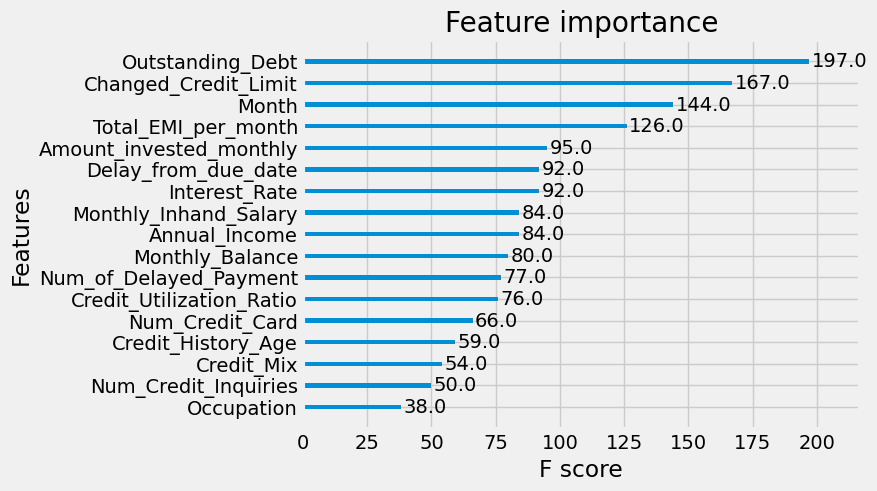

In [ ]:
# Set figure size
plt.figure(figsize=(40, 40))

# Plot feature importance
xgb.plot_importance(model2)
plt.show()

## Model Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

In [ ]:
# Create DMatrix for XGBoost
dtrain2 = xgb.DMatrix(X_train2, label=y_train2)

NameError: ignored

In [ ]:
# Define hyperparameters grid for tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [ ]:
# Create the XGBoost model
model2 = xgb.XGBClassifier()

In [ ]:
# Please don't run. It may take 1 hour.
# Perform grid search
#grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X_train2, y_train2)

In [ ]:
# Get the best parameters and model. I foubd the best parameter from my own laptop
best_params = grid_search.best_params_

In [ ]:
model2 = grid_search.best_estimator_

In [ ]:
# Train the XGBoost model with the best parameters
model2.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# Make predictions on the test set
y_pred2 = model2.predict(X_test2)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.7900900900900901
